<a href="https://colab.research.google.com/github/ShahedSabab/Heart-disease-prediction/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import missingno
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm
import pickle
COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(COLORS_PALETTE))
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [228]:
df = pd.read_csv('Cleveland.csv')
df

,Age,Sex,Chest Pain,Resting Blood Pressure,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Angima,ST Rest,Peak ST,Major vessels,Thal,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


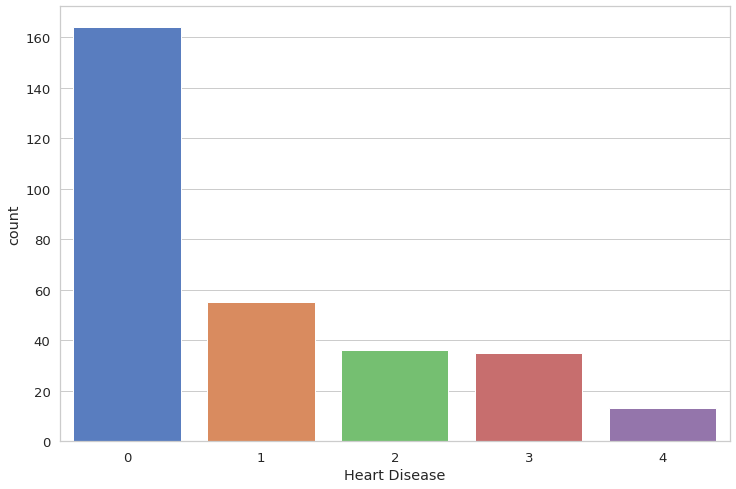

In [229]:
sns.countplot(x='Heart Disease', data=df)

### According to the description the value 1-4 means the presence of any heart disease and 0 means absence. Therefore, to make it simple the values ranging 1-4 are integrated into one signle value (representing as 1).  

In [230]:
df["Heart Disease"].replace({1:1, 2:1, 3:1, 4:1}, inplace=True)

In [231]:
df

,Age,Sex,Chest Pain,Resting Blood Pressure,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Angima,ST Rest,Peak ST,Major vessels,Thal,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


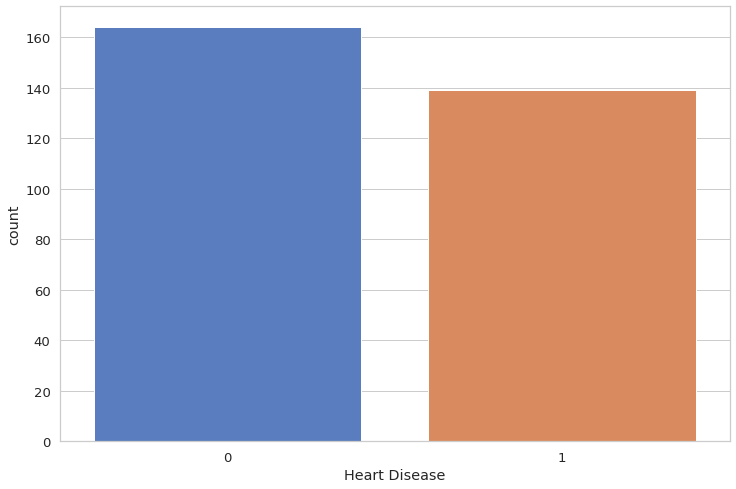

In [232]:
sns.countplot(x='Heart Disease', data=df)

### After the conversion the two classes seem pretty balanced.

# Transform missing values

In [233]:
# check the missing values indicated in the data by '?'
df[df == '?'].count().sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Major vessels             4
Thal                      2
Heart Disease             0
Peak ST                   0
ST Rest                   0
Angima                    0
Max Heart Rate            0
Resting ECG               0
Fasting Blood Sugar       0
Serum Cholestrol          0
Resting Blood Pressure    0
Chest Pain                0
Sex                       0
Age                       0
dtype: int64

In [234]:
# replace the ? with nan
df.replace({'?':np.nan}, inplace=True)

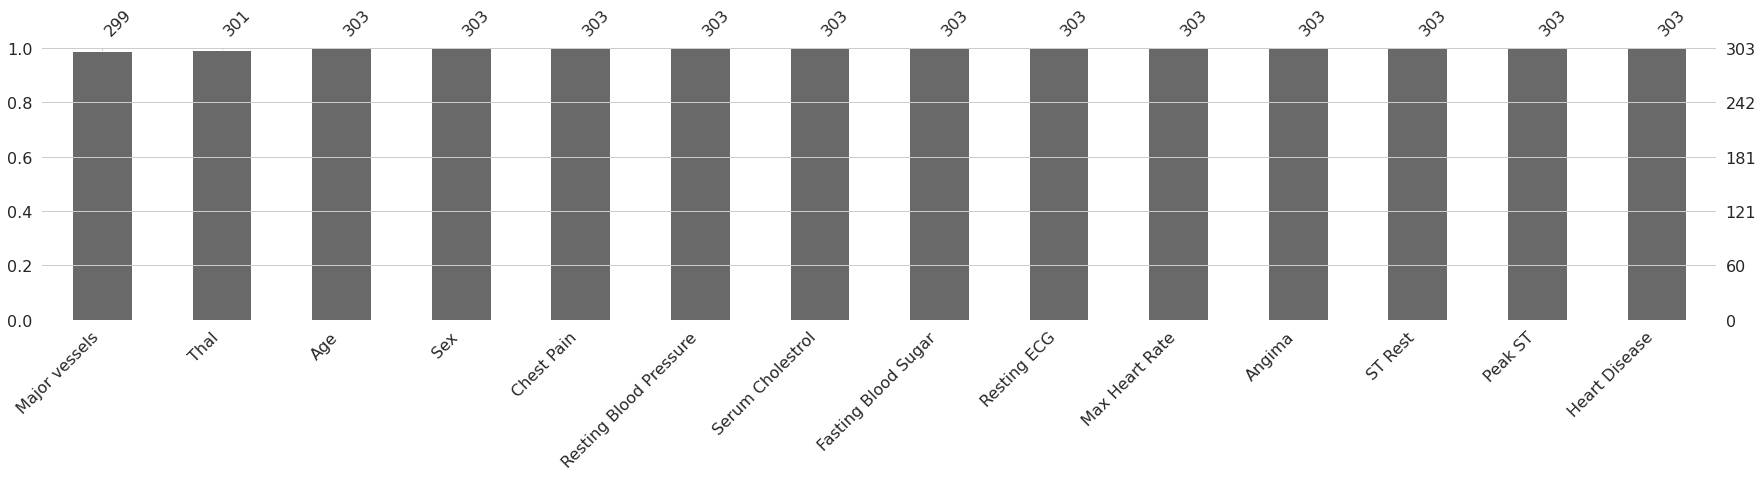

In [235]:
# check the cloumns with missing values
missingno.bar(df, sort='ascending', figsize = (30,5))

In [236]:
# Impute the missing values
cols = df.columns

# KNN imputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns = cols)


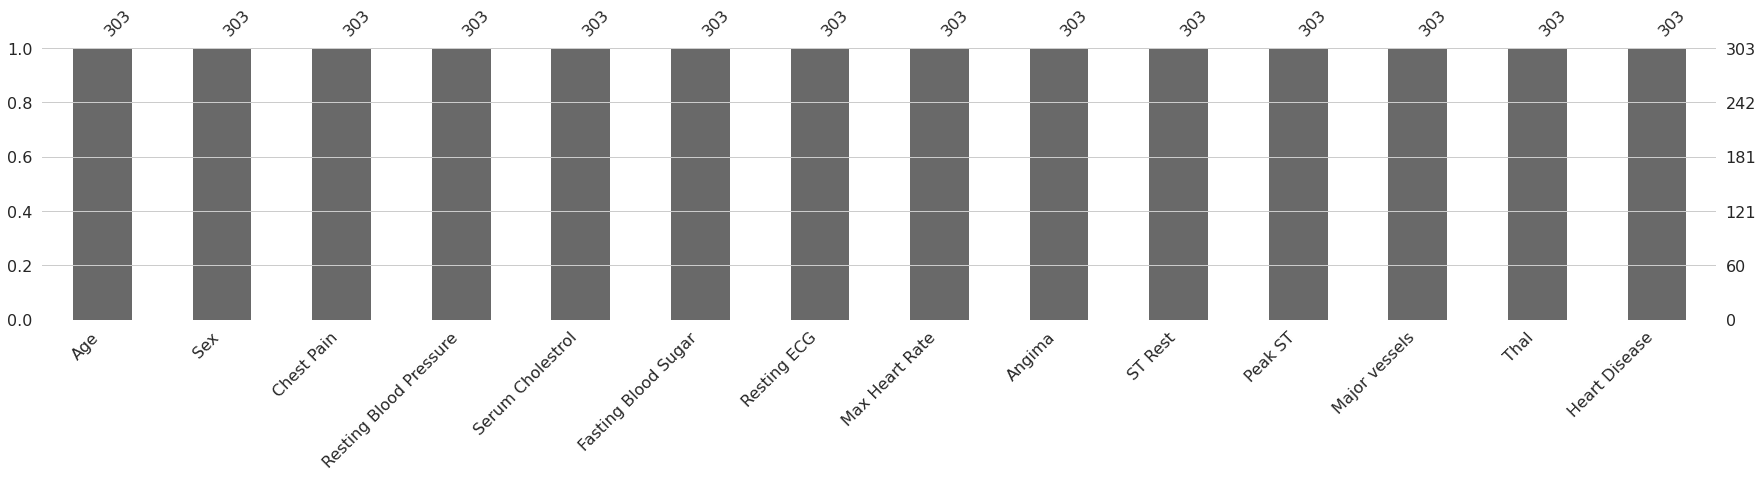

In [237]:
# check the cloumns with missing values
missingno.bar(df, sort='ascending', figsize = (30,5))

# Select top 10 features

[0.07500052 0.04550533 0.11858777 0.06457574 0.06101003 0.02067421
 0.03515909 0.08104219 0.09241407 0.08084238 0.06145197 0.12138088
 0.14235582]


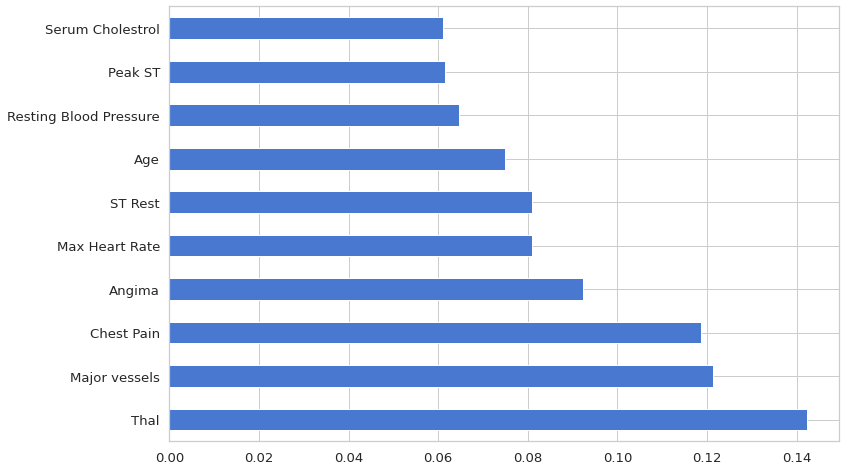

In [238]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns[0:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
selected_feature_index = feat_importances.nlargest(10).index

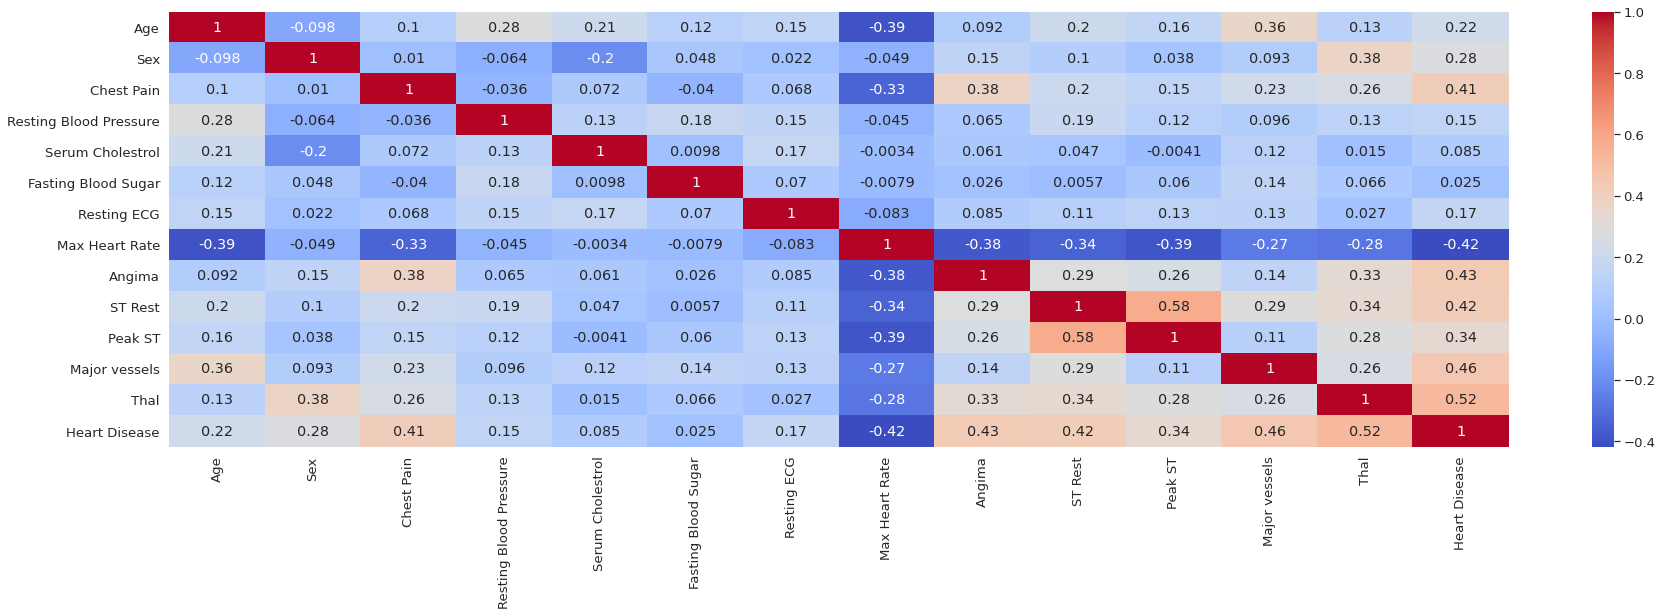

In [239]:
#check Pearson's correlation coeffcient
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

In [240]:
selected_cols = []
for ind in df.columns:
  if ind in selected_feature_index:
    selected_cols.append(ind)
# Impute the missing values
df_select = df[selected_cols]
X = df_select.values

In [241]:
df_select

,Age,Chest Pain,Resting Blood Pressure,Serum Cholestrol,Max Heart Rate,Angima,ST Rest,Peak ST,Major vessels,Thal
0,63.0,1.0,145.0,233.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,4.0,160.0,286.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,4.0,120.0,229.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,3.0,130.0,250.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,2.0,130.0,204.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,110.0,264.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,4.0,144.0,193.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,4.0,130.0,131.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,2.0,130.0,236.0,174.0,0.0,0.0,2.0,1.0,3.0


# Train-test Split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)

# Scale the data for distance based (KNN, SVM) / curve fitting (Logistic Regression) classifiers 

In [243]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Apply different classifiers

In [244]:
# Classificaiton metrics - precision, recall, f1, and accuracy
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

### Model SVM

In [245]:
# SVM
classifier_svm = SVC(kernel = 'linear')
classifier_svm.fit(X_train_sc, y_train)
# Predicting the Test set results
y_pred = classifier_svm.predict(X_test_sc)

In [246]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.902
precision = 0.902
recall = 0.902
f1 = 0.902


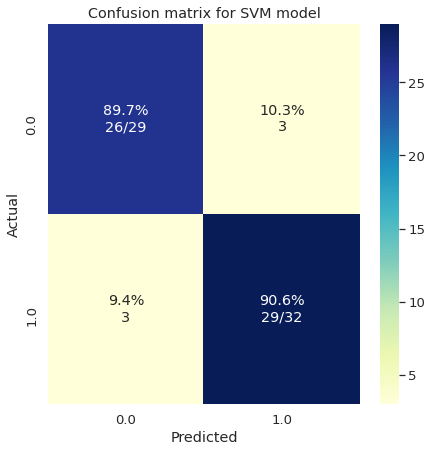

In [247]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for SVM model', figsize=(7,7))

In [248]:
# save the model's performance to a dataframe
data = {'model': 'SVM', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = pd.DataFrame(data, index=[0])

### Model Naive Bayes

In [249]:
# Naive Bayes Model
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_sc, y_train)
# Predicting the Test set results
y_pred = classifier_nb.predict(X_test_sc)

In [250]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.836
precision = 0.843
recall = 0.836
f1 = 0.836


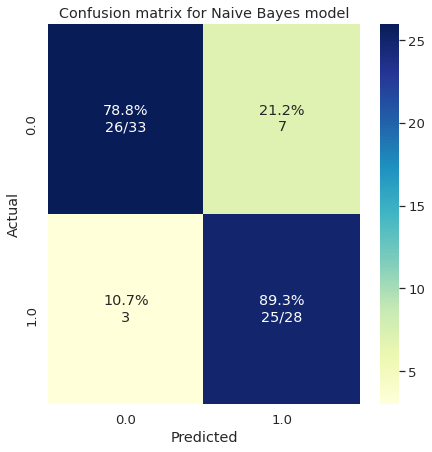

In [251]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Naive Bayes model', figsize=(7,7))

In [252]:
#Save the model's performance to a dataframe
data = {'model': 'Naive Bayes', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

### Model Logistic Regression

In [253]:
# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_sc, y_train)

# Predicting the Test set results
y_pred = classifier_lr.predict(X_test_sc)

In [254]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.885
precision = 0.886
recall = 0.885
f1 = 0.885


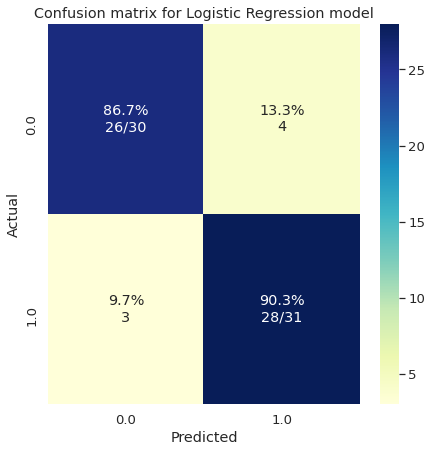

In [255]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Logistic Regression model', figsize=(7,7))

In [256]:
#Save the model's performance to a dataframe
data = {'model': 'Logistic Regression', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

### Model Decision Tree

In [257]:
# Tree based method do not necessarily need scaled data.
# Unscaled data is used for training and testing
# Deicision Tree
classifier_dt = DecisionTreeClassifier(random_state = RANDOM_SEED)
classifier_dt.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier_dt.predict(X_test)


In [258]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.787
precision = 0.787
recall = 0.787
f1 = 0.787


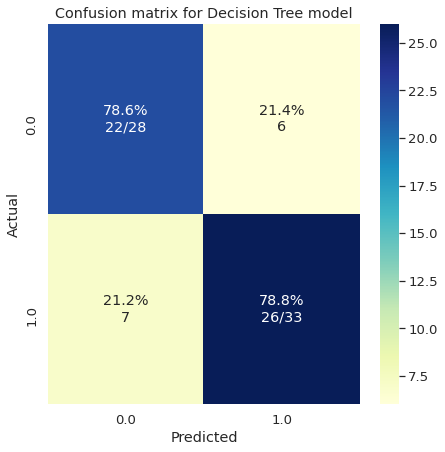

In [259]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Decision Tree model', figsize=(7,7))

In [260]:
#Save the model's performance to a dataframe
data = {'model': 'Decision Tree', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

### Model Random Forest

In [261]:
# Tree based methods do not necessarily need scaled data.
# Unscaled data is used for training and testing
# Random Forest
classifier_rf = RandomForestClassifier(n_estimators = 30, random_state = RANDOM_SEED)
classifier_rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)


In [262]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.869
precision = 0.871
recall = 0.869
f1 = 0.869


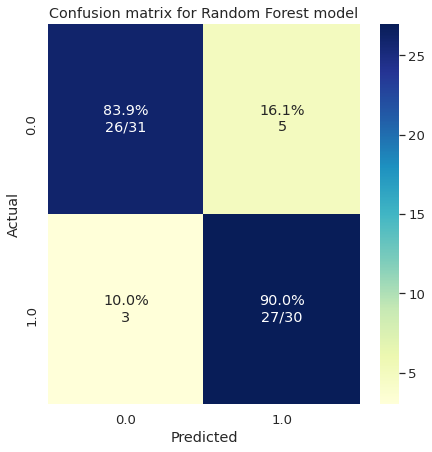

In [263]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Random Forest model', figsize=(7,7))

In [264]:
#Save the model's performance to a dataframe
data = {'model': 'Random Forest', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

### Model XGBoost

In [265]:
# Tree based methods do not necessarily need scaled data.
# Unscaled data is used for training and testing
# Extreme Gradient Boost
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)
y_pred = classifier_xgb.predict(X_test)


In [266]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.836
precision = 0.838
recall = 0.836
f1 = 0.836


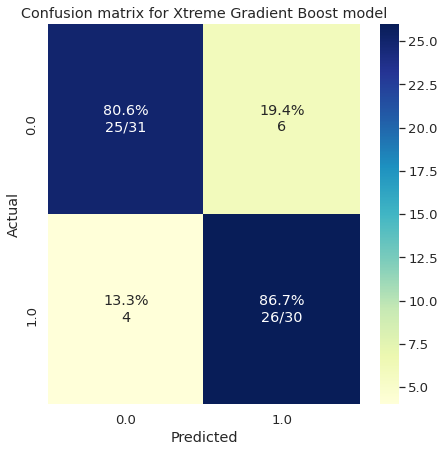

In [267]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Xtreme Gradient Boost model', figsize=(7,7))

In [268]:
#Save the model's performance to a dataframe
data = {'model': 'Extreme Gradient Boost', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

### Model LightGBM 

In [269]:
# Tree based methods do not necessarily need scaled data.
# Unscaled data is used for training and testing
# light gradient boost model
lgb = lightgbm
d_train = lgb.Dataset(X_train, label = y_train)
params = {}

classifier_lgb = lgb.train(params, d_train, 100)
#Prediction
y_pred = classifier_lgb.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [270]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f\nprecision = %.3f\nrecall = %.3f\nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.836
precision = 0.843
recall = 0.836
f1 = 0.836


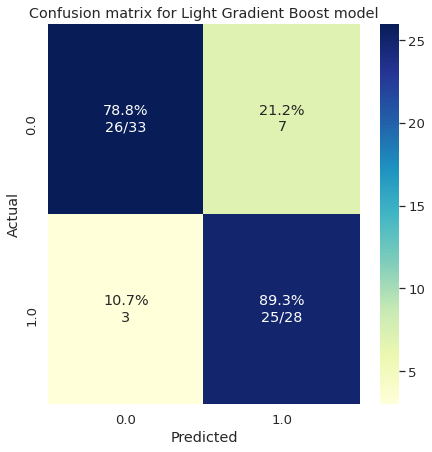

In [271]:
# Showing Confusion Matrix
plot_cm(y_pred, y_test, 'Confusion matrix for Light Gradient Boost model', figsize=(7,7))

In [272]:
#Save the model's performance to a dataframe
data = {'model': 'Light Gradient Boost', 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy' : accuracy}
df_performance = df_performance.append(data, ignore_index=True)

# Compare Different Model's Performance

In [273]:
df_plot_performance = df_performance.sort_values(by='accuracy', ascending=False)
df_plot_performance

,model,precision,recall,f1,accuracy
0,SVM,0.901639,0.901639,0.901639,0.901639
2,Logistic Regression,0.885845,0.885246,0.885308,0.885246
4,Random Forest,0.870862,0.868852,0.868923,0.868852
1,Naive Bayes,0.842949,0.836066,0.835889,0.836066
5,Extreme Gradient Boost,0.838040,0.836066,0.836154,0.836066
6,Light Gradient Boost,0.842949,0.836066,0.835889,0.836066
3,Decision Tree,0.786850,0.786885,0.786655,0.786885


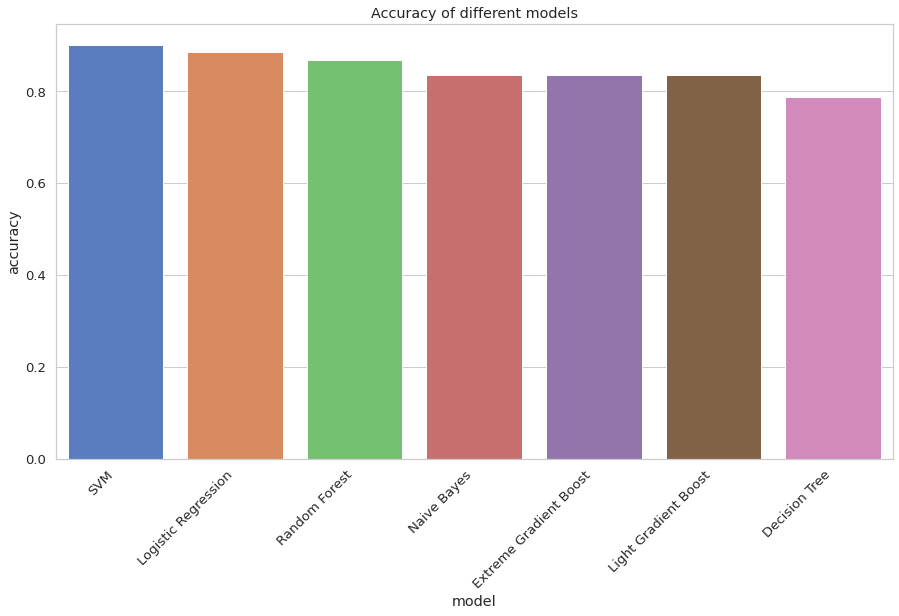

In [274]:
plt.figure(figsize=(15,8))
plt.title("Accuracy of different models")
chart = sns.barplot(x="model", y="accuracy", data=df_plot_performance)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment= 'right')
plt.show()

The best model we have got here is SVM.

# Save the best performing model

In [275]:
## Create a Pickle file using serialization 
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier_svm, pickle_out)
pickle_out.close()

# Save the Standardscaler (for SVM)

In [276]:
## Create a Pickle file using serialization 
pickle_out = open("scaler.pkl","wb")
pickle.dump(sc, pickle_out)
pickle_out.close()

# Check if it works

In [285]:
# pickle_in = open('classifier.pkl', 'rb')
# classifier = pickle.load(pickle_in)
# scaler_in = open('scaler.pkl', 'rb')
# scaler = pickle.load(scaler_in)
# x = [[67,4,120,229,129,1,2.6,2,2,7]]
# x = scaler.transform(x)
# pred = classifier.predict(x)
# pred